In [1]:
!pip install kaggle

In [3]:
import os
import zipfile

# Setting environment
os.environ['KAGGLE_CONFIG_DIR'] = os.path.join(os.path.expanduser("~"), ".kaggle")

# Downloading the dataset from Kaggle
!kaggle datasets download -d jangedoo/utkface-new

# Creating the output directory
output_dir = "datasets/UTKFace"
os.makedirs(output_dir, exist_ok=True)

# Unziping the dataset into the folder
with zipfile.ZipFile("utkface-new.zip", 'r') as zip_ref:
    zip_ref.extractall(output_dir)

# Notifies the data is downloaded
print("Dataset downloaded and extracted successfully to:", output_dir)


  0%|          | 0.00/331M [00:00<?, ?B/s]
 14%|#3        | 46.0M/331M [00:00<00:00, 473MB/s]
 28%|##7       | 92.0M/331M [00:00<00:00, 449MB/s]
 41%|####      | 135M/331M [00:00<00:00, 432MB/s] 
 53%|#####3    | 177M/331M [00:00<00:00, 362MB/s]
 64%|######4   | 213M/331M [00:00<00:00, 301MB/s]
 74%|#######3  | 244M/331M [00:00<00:00, 288MB/s]
 82%|########2 | 273M/331M [00:00<00:00, 285MB/s]
 91%|#########1| 303M/331M [00:00<00:00, 292MB/s]
100%|##########| 331M/331M [00:01<00:00, 318MB/s]


Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors

Dataset downloaded and extracted successfully to: datasets/UTKFace


✅ Gender Distribution:
Male:   12391
Female: 11287

✅ Race Distribution:
White: 10078
Black: 4526
Asian: 3427
Indian: 3957
Others: 1690


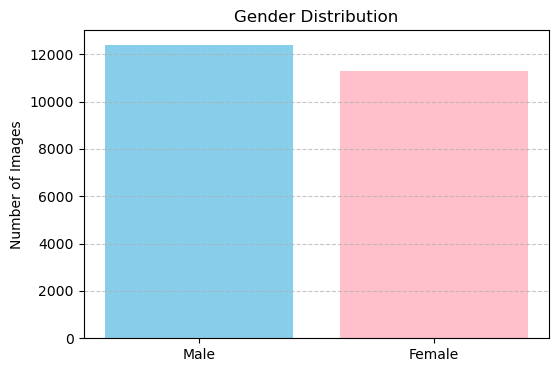

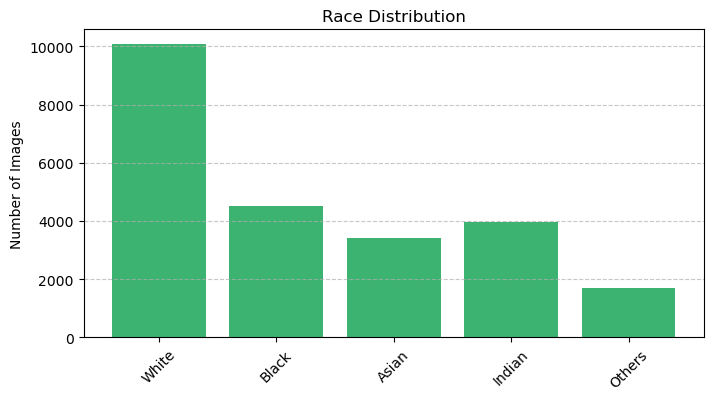

In [1]:
import os
import matplotlib.pyplot as plt

# Define your dataset directory
dataset_path = 'datasets/UTKFace/utkface_aligned_cropped/UTKFace/'

# Initialize counters
gender_counts = {0: 0, 1: 0}  # 0 = Male, 1 = Female
race_counts = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
race_labels = ['White', 'Black', 'Asian', 'Indian', 'Others']

# Process each file
for filename in os.listdir(dataset_path):
    if filename.endswith('.jpg'):
        try:
            age, gender, race = map(int, filename.split('_')[:3])
            if gender in gender_counts:
                gender_counts[gender] += 1
            if race in race_counts:
                race_counts[race] += 1
        except:
            continue

# Print Stats
print("✅ Gender Distribution:")
print(f"Male:   {gender_counts[0]}")
print(f"Female: {gender_counts[1]}\n")

print("✅ Race Distribution:")
for i, label in enumerate(race_labels):
    print(f"{label}: {race_counts[i]}")

# Plot Gender Distribution
plt.figure(figsize=(6, 4))
plt.bar(['Male', 'Female'], [gender_counts[0], gender_counts[1]], color=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.ylabel('Number of Images')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Race Distribution
plt.figure(figsize=(8, 4))
plt.bar(race_labels, [race_counts[i] for i in range(5)], color='mediumseagreen')
plt.title('Race Distribution')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [5]:
import os
import pandas as pd

dataset_path = 'datasets/UTKFace/utkface_aligned_cropped/UTKFace/'
image_data = []

for filename in os.listdir(dataset_path):
    if filename.endswith('.jpg'):
        try:
            age, gender, race = map(int, filename.split('_')[:3])
            if age < 5 or age > 90:
                continue  # Skip suspicious ages
            image_data.append((filename, gender, race))
        except:
            continue

# Convert to DataFrame
df = pd.DataFrame(image_data, columns=['filename', 'gender', 'race'])

# Map race labels for clarity
race_labels = {0: 'White', 1: 'Black', 2: 'Asian', 3: 'Indian', 4: 'Others'}
df['race_label'] = df['race'].map(race_labels)

# Show counts before sampling
print("Before downsampling:")
print(df['race_label'].value_counts())

Before downsampling:
race_label
White     9422
Black     4433
Indian    3571
Asian     2606
Others    1392
Name: count, dtype: int64


In [15]:
# ✅ Downsample based on race
min_class_size = df['race'].value_counts().min()

df_balanced = (
    df.groupby('race', group_keys=False)
    .apply(lambda x: x.sample(min_class_size, random_state=42), include_groups=False)
    .reset_index(drop=True)
)

# ✅ Re-attach race_label if missing
if 'race_label' not in df_balanced.columns:
    df_balanced['race_label'] = df_balanced['race'].map(race_labels)

# ✅ Check result
print("\nAfter downsampling:")
print(df_balanced['race_label'].value_counts())


After downsampling:
race_label
White     1392
Black     1392
Asian     1392
Indian    1392
Others    1392
Name: count, dtype: int64


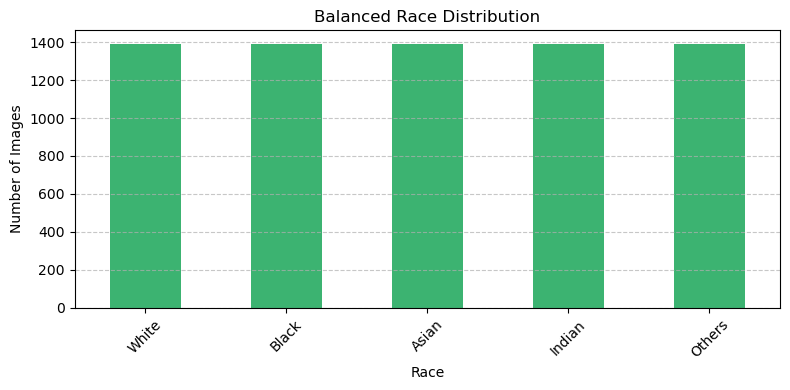

In [19]:
# Plot Race Distribution
plt.figure(figsize=(8, 4))
df_balanced['race_label'].value_counts().plot(kind='bar', color='mediumseagreen')

plt.title('Balanced Race Distribution')
plt.ylabel('Number of Images')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [51]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [53]:
# ✅ Step 1: Check current gender distribution in the race-balanced DataFrame
print("Gender distribution BEFORE gender downsampling:")
print(df_balanced['gender'].value_counts())

# ✅ Step 2: Downsample based on gender
min_gender_count = df_balanced['gender'].value_counts().min()

df_balanced_gender = (
    df_balanced.groupby('gender', group_keys=False)
    .apply(lambda x: x.sample(min_gender_count, random_state=42))
    .reset_index(drop=True)
)

# ✅ Step 3: Confirm new distribution
print("\n✅ Gender distribution AFTER downsampling:")
print(df_balanced_gender['gender'].value_counts())

Gender distribution BEFORE gender downsampling:
gender
0    3513
1    3447
Name: count, dtype: int64

✅ Gender distribution AFTER downsampling:
gender
0    3447
1    3447
Name: count, dtype: int64


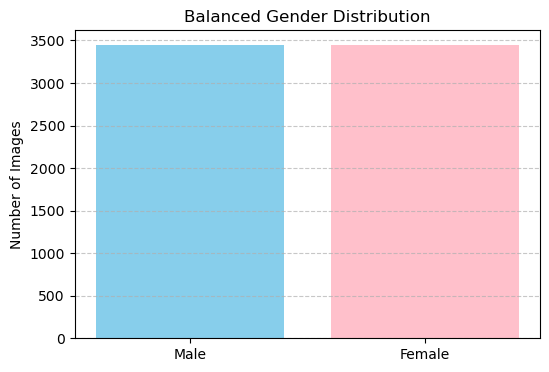

In [57]:
# ✅ Plot Balanced Gender Distribution
plt.figure(figsize=(6, 4))
gender_counts_balanced = df_balanced_gender['gender'].value_counts()
plt.bar(['Male', 'Female'], [gender_counts_balanced[0], gender_counts_balanced[1]], color=['skyblue', 'pink'])
plt.title('Balanced Gender Distribution')
plt.ylabel('Number of Images')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [59]:
# Save as CSV (contains filename, gender, race, race_label)
df_balanced_gender.to_csv("balanced_utkface_metadata.csv", index=False)
print("✅ Saved cleaned metadata to 'balanced_utkface_metadata.csv'")

✅ Saved cleaned metadata to 'balanced_utkface_metadata.csv'
